In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import sys
import os 

Instructions for updating:
non-resource variables are not supported in the long term


## Load data

In [3]:
D_PATH = './DATA/2dhit-txy-128-20-uvw.npz'

N_SNAP = 20
DIM_X, DIM_Y = 128, 128

TRAIN_DATA= np.load(D_PATH)['data'][:N_SNAP*DIM_X*DIM_Y,:]
std_tr = np.load(D_PATH)['std']
mean_tr = np.load(D_PATH)['mean']

# only take first snapshot
batch_t = TRAIN_DATA[:N_SNAP*DIM_X**2,0].reshape(-1,1)
batch_x = TRAIN_DATA[:N_SNAP*DIM_X**2,1].reshape(-1,1)
batch_y = TRAIN_DATA[:N_SNAP*DIM_X**2,2].reshape(-1,1)
u_true = TRAIN_DATA[:N_SNAP*DIM_X**2,3].reshape(N_SNAP,DIM_X,DIM_X)

In [4]:
model_list_36 = [
    'MLP_TANH/HIT_MLP_SIREN_NSNAP_20_NSX_36_OMEGA_30.0_LSX_4_BS_120000',
    'MLP_RELU/HIT_MLP_SIREN_NSNAP_20_NSX_36_OMEGA_30.0_LSX_4_BS_120000',
    'MLP_FF/HIT_MLP_FF__N_FF_256_SIGMA_FF_1.0_NSNAP_20_NSX_36_LSX_4_BS_120000',
    'MLP_FF/HIT_MLP_FF__N_FF_256_SIGMA_FF_10.0_NSNAP_20_NSX_36_LSX_4_BS_120000',
    'MLP_FF/HIT_MLP_FF__N_FF_256_SIGMA_FF_100.0_NSNAP_20_NSX_36_LSX_4_BS_120000',
    'MLP/HIT_MLP_SIREN_NSNAP_20_NSX_36_OMEGA_30.0_LSX_4_BS_120000',
    'NIF/HIT_NIF_SIREN_NSNAP_20_NSX_36_OMEGA_30.0_LSX_4_NST_50_LST_2_NP_10_BS_20000'
]


model_list_75 = [
    'MLP_TANH/HIT_MLP_SIREN_NSNAP_20_NSX_75_OMEGA_30.0_LSX_4_BS_120000',
    'MLP_RELU/HIT_MLP_SIREN_NSNAP_20_NSX_75_OMEGA_30.0_LSX_4_BS_120000',
    'MLP_FF/HIT_MLP_FF__N_FF_256_SIGMA_FF_1.0_NSNAP_20_NSX_75_LSX_4_BS_120000',
    'MLP_FF/HIT_MLP_FF__N_FF_256_SIGMA_FF_10.0_NSNAP_20_NSX_75_LSX_4_BS_120000',
    'MLP_FF/HIT_MLP_FF__N_FF_256_SIGMA_FF_100.0_NSNAP_20_NSX_75_LSX_4_BS_120000',
    'MLP/HIT_MLP_SIREN_NSNAP_20_NSX_75_OMEGA_30.0_LSX_4_BS_120000',
    'NIF/HIT_NIF_SIREN_NSNAP_20_NSX_75_OMEGA_30.0_LSX_4_NST_50_LST_2_NP_10_BS_5000'
]

model_list_150 = [
    'MLP_TANH/HIT_MLP_SIREN_NSNAP_20_NSX_150_OMEGA_30.0_LSX_4_BS_120000',
    'MLP_RELU/HIT_MLP_SIREN_NSNAP_20_NSX_150_OMEGA_30.0_LSX_4_BS_120000',
    'MLP_FF/HIT_MLP_FF__N_FF_256_SIGMA_FF_1.0_NSNAP_20_NSX_150_LSX_4_BS_120000',
    'MLP_FF/HIT_MLP_FF__N_FF_256_SIGMA_FF_10.0_NSNAP_20_NSX_150_LSX_4_BS_120000',
    'MLP_FF/HIT_MLP_FF__N_FF_256_SIGMA_FF_100.0_NSNAP_20_NSX_150_LSX_4_BS_120000',
    'MLP/HIT_MLP_SIREN_NSNAP_20_NSX_150_OMEGA_30.0_LSX_4_BS_120000',
    'NIF/HIT_NIF_SIREN_NSNAP_20_NSX_150_OMEGA_30.0_LSX_4_NST_50_LST_2_NP_10_BS_1400'
]

model_str_list = [
    'MLP (tanh)',
    'MLP (relu)',
    'Fourier Feature NN' + "\n" + r'($\sigma=1$, relu)',
    'Fourier Feature NN' + "\n" + r'($\sigma=10$, relu)',
    'Fourier Feature NN' + "\n" + r'($\sigma=100$, relu)',
    'SIREN',
    'NIF'
]

## read data

In [5]:
def read(modelpath):
    path = './compare_2d_with_variants/' + modelpath + '/saved_model_ckpt_100000'
    if not os.path.exists(path):
        path = './compare_2d_with_variants/' + modelpath + '/saved_model_ckpt_500'
    tmp = np.load(path+'/pred.npz')
    return tmp['u_pred']

## width 36

In [6]:
u_pred_36_list = []
for modelpath in model_list_36:
    u_pred = read(modelpath)
    u_pred_36_list.append(u_pred)
    
u_pred_36_list.append(u_true)
model_str_list.append('True')

## width 75

In [7]:
u_pred_75_list = []
for modelpath in model_list_75:
    u_pred = read(modelpath)
    u_pred_75_list.append(u_pred)
    
u_pred_75_list.append(u_true)

## width 150

In [8]:
u_pred_150_list = []
for modelpath in model_list_150:
    u_pred = read(modelpath)
    u_pred_150_list.append(u_pred)
    
u_pred_150_list.append(u_true)

## compute error

In [28]:
import pandas as pd

In [48]:
err_36_list = []
for i in range(len(u_pred_36_list)-1):
    a = np.linalg.norm(u_pred_36_list[i]-u_pred_36_list[-1])/ np.linalg.norm(u_pred_36_list[-1])
    err_36_list.append(a)
err_75_list = []
for i in range(len(u_pred_75_list)-1):
    a = np.linalg.norm(u_pred_75_list[i]-u_pred_75_list[-1])/ np.linalg.norm(u_pred_36_list[-1])
    err_75_list.append(a)
err_150_list = []
for i in range(len(u_pred_150_list)-1):
    a = np.linalg.norm(u_pred_150_list[i]-u_pred_150_list[-1])/ np.linalg.norm(u_pred_36_list[-1])
    err_150_list.append(a)
err = np.vstack([err_36_list, err_75_list, err_150_list])

In [53]:
df = pd.DataFrame(err, index=['width=36', 'width=75','width=150'],columns=model_str_list[:-1])

In [55]:
df.to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n{} &  MLP (tanh) &  MLP (relu) &  Fourier Feature NN\\textbackslash n(\\$\\textbackslash sigma=1\\$, relu) &  Fourier Feature NN\\textbackslash n(\\$\\textbackslash sigma=10\\$, relu) &  Fourier Feature NN\\textbackslash n(\\$\\textbackslash sigma=100\\$, relu) &     SIREN &       NIF \\\\\n\\midrule\nwidth=36  &    0.356886 &    0.195962 &                                0.390604 &                                 0.264704 &                                  0.262562 &  0.121444 &  0.070941 \\\\\nwidth=75  &    0.289948 &    0.171981 &                                0.361140 &                                 0.260149 &                                  0.241287 &  0.039191 &  0.022485 \\\\\nwidth=150 &    0.236278 &    0.144220 &                                0.353076 &                                 0.285246 &                                  0.247678 &  0.011648 &  0.013179 \\\\\n\\bottomrule\n\\end{tabular}\n'

## plot and compare

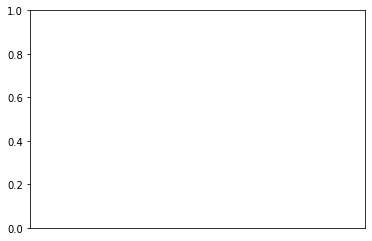

In [22]:
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
def savefig(i_time):
    fig,axs=plt.subplots(1*3,8,figsize=(25,3*3))
    # i_time = 19
    # 36
    for i, ax in enumerate(axs[0]):
        ax.contourf(u_pred_36_list[i][i_time],levels=100,cmap='twilight')
        # ax.axis('off')
        ax.set_title(model_str_list[i],fontsize=22)
        
        if i == 0:
            ax.set_ylabel('width = 36',fontsize=22)
        ax.tick_params(axis=u'both', which=u'both',length=0)
        ax.set_xticks([]) 
        ax.set_yticks([]) 
    
    # 75
    for i, ax in enumerate(axs[1]):
        ax.contourf(u_pred_75_list[i][i_time],levels=100,cmap='twilight')
        # ax.axis('off')
        if i == 0:
            ax.set_ylabel('width = 75',fontsize=22)
        ax.tick_params(axis=u'both', which=u'both',length=0)
        
        # ax.set_title(model_str_list[i],fontsize=15)
        ax.set_xticks([]) 
        ax.set_yticks([]) 
    
    # 150
    for i, ax in enumerate(axs[2]):
        ax.contourf(u_pred_150_list[i][i_time],levels=100,cmap='twilight')
        # ax.axis('off')
        if i == 0:
            ax.set_ylabel('width = 150',fontsize=22)
        ax.tick_params(axis=u'both', which=u'both',length=0)
        ax.set_xticks([]) 
        ax.set_yticks([]) 
        
    fig.tight_layout()
    # fig.layout('tight')
    plt.savefig('png/'+str(i_time)+'.png',bbox_inches='tight',transparent=False,facecolor='w')

    plt.close()
    
for i in range(20):
    savefig(i)